# Import and set colors

In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
from gprofiler import gprofiler

import os 

#external modules
import scanpy.external as sce
#pretty plotting
import seaborn as sb


In [2]:
plt.rcParams['figure.figsize']=(4,4) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=False, fontsize=12, color_map='plasma')
sc.logging.print_header()

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.22.3 scipy==1.8.0 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.4


In [3]:
#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
pair= [ "#DA0AD3", "#ED99BD",  "#FD3F14", "#ffbf00", 
       "#66B032", "#66B032", "#9AD255", "#9AD255",
       "#b30047",   "#dada2b", "#dada2b"]

# Set project file paths

In [5]:
file_path = '/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/Revision/'
#this is my file path please adapt it to your directory

In [6]:
data_dir =file_path +  'data/' 

In [7]:
table_dir = file_path + 'tables/230831diffxpy/'

In [8]:
sc.settings.figdir = file_path + 'figures/'

In [9]:
import datetime

today = datetime.date.today().strftime('%y%m%d') #creates a YYMMDD string of today's date

# Read Data & downstream analysis

In [10]:
adata_all_astros=sc.read(data_dir + "230808adata_treated_astros_proc_scVI.h5ad")

In [11]:
adata_all_astros

AnnData object with n_obs × n_vars = 16025 × 15747
    obs: 'sample_id', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'doublet_score', 'doublet', 'size_factors', 'leiden', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'leiden13', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden_all', 'S_score', 'G2M_score', 'phase', 'Cycling cells', 'cell_cycle', 'Microglia', 'DAM', 'Macrophages', 'BAM', 'Monocytes', 'DCs', 'NKT cells', 'T cells', 'B cells', 'Neutrophils', 'Neurons', 'OPCs', 'COPs', 'MOL', 'Astrocytes', 'Pericytes', 'VSMCs', 'VLMCs', 'VEC', 'annotated', 'annotated_group', 'leiden_astros_r1', 'leiden_astros_r0.5', 'leiden_astros_r0.4', 'leiden_astros_r0.6', 'clustersastros', 'reactive_

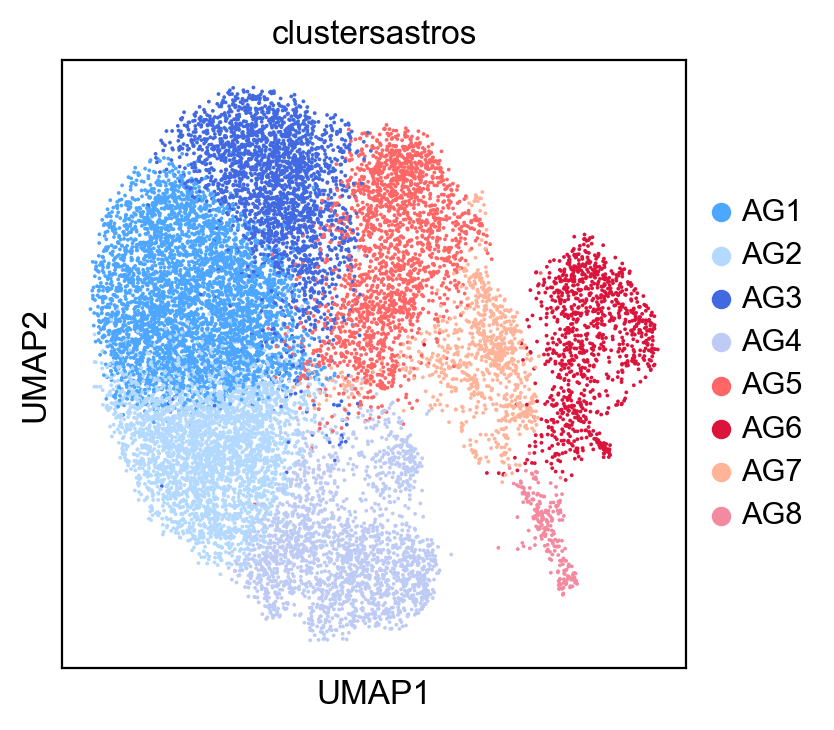

In [12]:
sc.pl.umap(adata_all_astros, color='clustersastros')

In [13]:
adata_all_astros_3dpi= adata_all_astros[np.in1d(adata_all_astros.obs['condition'], 
                           ['3dpi_CTRL','3dpi_INH'])].copy()

In [14]:
import batchglm.api as glm
import diffxpy.api as de

print("batchglm version "+glm.__version__)
print("diffpy version "+de.__version__)
from batchglm.pkg_constants import TF_CONFIG_PROTO

batchglm version v0.7.4
diffpy version v0.7.4


In [15]:
#Set number of threads
TF_CONFIG_PROTO.inter_op_parallelism_threads = 1
TF_CONFIG_PROTO.intra_op_parallelism_threads = 12

# 3dpi

In [16]:
adata_all_astros_3dpi.obs['clustersastros'].value_counts()*0.1

AG1    70.7
AG6    34.4
AG2    33.8
AG5    25.4
AG7    19.4
AG8    13.4
AG3    11.9
AG4    10.5
Name: clustersastros, dtype: float64

In [17]:
adata_all_astros_3dpi_AG1= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG1'])].copy()

In [18]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG1.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_3dpi_AG1, min_cells=71)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG1.n_vars))

Total number of genes: 15747
filtered out 10369 genes that are detected in less than 71 cells
Number of genes after cell filter: 5378


In [19]:
adata_all_astros_3dpi_AG2= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG2'])].copy()

In [20]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_3dpi_AG2, min_cells=34)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG2.n_vars))

Total number of genes: 15747
filtered out 11507 genes that are detected in less than 34 cells
Number of genes after cell filter: 4240


In [21]:
adata_all_astros_3dpi_AG3= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG3'])].copy()

In [22]:
###### Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG3.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_3dpi_AG3, min_cells=12)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG3.n_vars))

Total number of genes: 15747
filtered out 9842 genes that are detected in less than 12 cells
Number of genes after cell filter: 5905


In [23]:
adata_all_astros_3dpi_AG4= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG4'])].copy()

In [24]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG4.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_3dpi_AG4, min_cells=11)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG4.n_vars))

Total number of genes: 15747
filtered out 11176 genes that are detected in less than 11 cells
Number of genes after cell filter: 4571


In [25]:
adata_all_astros_3dpi_AG5= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG5'])].copy()

In [26]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG5.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_3dpi_AG5, min_cells=25)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG5.n_vars))

Total number of genes: 15747
filtered out 7483 genes that are detected in less than 25 cells
Number of genes after cell filter: 8264


In [27]:
adata_all_astros_3dpi_AG6= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG6'])].copy()

In [28]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG6.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_3dpi_AG6, min_cells=34)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG6.n_vars))

Total number of genes: 15747
filtered out 11287 genes that are detected in less than 34 cells
Number of genes after cell filter: 4460


In [29]:
adata_all_astros_3dpi_AG7= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG7'])].copy()

In [30]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG7.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_3dpi_AG7, min_cells=19)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG7.n_vars))

Total number of genes: 15747
filtered out 6063 genes that are detected in less than 19 cells
Number of genes after cell filter: 9684


In [31]:
adata_all_astros_3dpi_AG8= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG8'])].copy()

In [32]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG8.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_3dpi_AG8, min_cells=13)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG8.n_vars))

Total number of genes: 15747
filtered out 8230 genes that are detected in less than 13 cells
Number of genes after cell filter: 7517


# Cluster AG1

In [33]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG1= de.test.wald(
    data=adata_all_astros_3dpi_AG1.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG1.var_names,
    sample_description=adata_all_astros_3dpi_AG1.obs
)

training location model: False
training scale model: True
iter   0: ll=25573630.726190
iter   1: ll=25573630.726190, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=3211695.650142, converged: 0.87% (loc: 0.87%, scale update: True), in 12.79sec
iter   3: ll=3211695.650142, converged: 0.87% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=3071206.055713, converged: 92.06% (loc: 92.06%, scale update: True), in 11.06sec
iter   5: ll=3071206.055713, converged: 92.06% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=3059310.779549, converged: 98.35% (loc: 98.35%, scale update: True), in 5.91sec
iter   7: ll=3059310.779549, converged: 98.35% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=3056378.198383, converged: 99.65% (loc: 99.65%, scale update: True), in 5.58sec
iter   9: ll=3056378.198383, converged: 99.65% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=3056255.936505, converged: 99.98% (loc: 99.98%, scale 

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [34]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG1.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1058,S100a6,3.952394e-14,2.125597e-10,0.784470,2.093352,False,2.571607e-09,0.784470,0.103732,-1344.592492
3924,Gfap,1.562950e-11,4.202772e-08,0.797149,2.818953,False,1.900975e-10,0.797149,0.118237,-1484.672271
276,Atp1a2,4.916378e-11,6.610071e-08,0.242063,23.619519,False,1.237196e-09,0.242063,0.036824,-2654.911323
980,Dclk1,4.217626e-11,6.610071e-08,0.318867,7.281471,False,3.722524e-08,0.318867,0.048341,-1986.694287
2891,Scrg1,6.172596e-11,6.639244e-08,0.449601,3.200849,False,8.534724e-10,0.449601,0.068752,-1572.476591
5264,Fth1,1.072122e-10,9.609790e-08,0.311013,17.287129,False,1.617885e-08,0.311013,0.048171,-2579.754206
5217,Malat1,2.627860e-10,1.633098e-07,0.218701,659.620934,False,1.966745e-07,0.218701,0.034609,-4970.355373
2556,Cd81,2.718936e-10,1.633098e-07,0.297707,18.005658,False,9.611155e-09,0.297707,0.047150,-2600.802776
2144,Cd9,2.732965e-10,1.633098e-07,0.568976,3.322489,False,7.741925e-09,0.568976,0.090125,-1633.739680
1472,Id3,3.918712e-10,2.107483e-07,0.698810,3.386139,False,1.279575e-08,0.698810,0.111680,-1608.062974


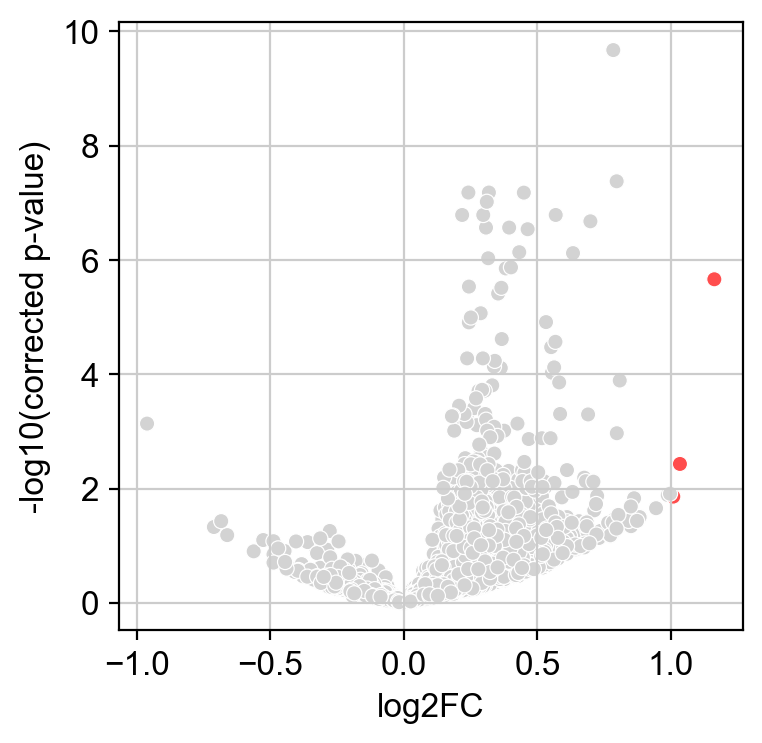

In [35]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG1.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [37]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG1.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_INHvsCTRL_AG1.csv')

In [39]:
difxpy_3dpi_INHvsCTRL_AG1 = pd.read_csv(table_dir + '230831difxpy_reactiveastros_3dpi_INHvsCTRL_AG1.csv', index_col=0)

In [40]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_AG1=difxpy_3dpi_INHvsCTRL_AG1.loc[difxpy_3dpi_INHvsCTRL_AG1['mean']>0.2]

In [41]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_AG1 = difxpy_3dpi_INHvsCTRL_expressed_AG1.loc[difxpy_3dpi_INHvsCTRL_expressed_AG1['pval']<0.05]

In [42]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_3dpi_INH_AG1 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG1.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG1['log2fc']>0.7]
Astros_3dpi_CTRL_AG1 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG1.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG1['log2fc']<-0.7]

In [43]:
Astros_3dpi_INH_AG1.shape

(9, 10)

In [44]:
Astros_3dpi_CTRL_AG1.shape

(0, 10)

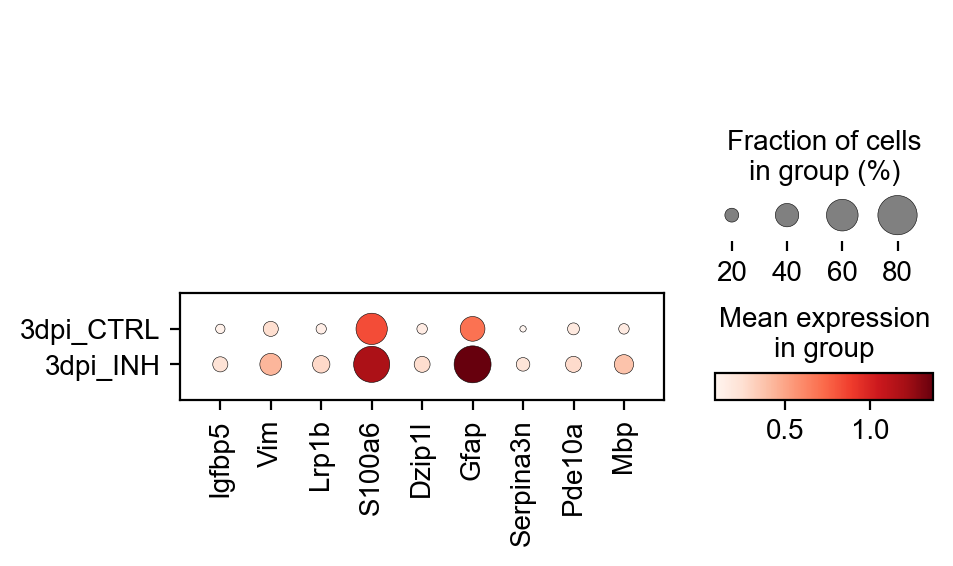

In [45]:
sc.pl.dotplot(adata_all_astros_3dpi_AG1,Astros_3dpi_INH_AG1['gene'].head(30) , groupby='condition',)

# Cluster AG2

In [46]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG2= de.test.wald(
    data=adata_all_astros_3dpi_AG2.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG2.var_names,
    sample_description=adata_all_astros_3dpi_AG2.obs
)

training location model: False
training scale model: True
iter   0: ll=19820707.441820
iter   1: ll=19820707.441820, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1062200.161669, converged: 0.64% (loc: 0.64%, scale update: True), in 9.42sec
iter   3: ll=1062200.161669, converged: 0.64% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=975613.300376, converged: 86.04% (loc: 86.04%, scale update: True), in 9.13sec
iter   5: ll=975613.300376, converged: 86.04% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=965815.523266, converged: 96.91% (loc: 96.91%, scale update: True), in 5.80sec
iter   7: ll=965815.523266, converged: 96.91% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=963301.541791, converged: 99.39% (loc: 99.39%, scale update: True), in 5.17sec
iter   9: ll=963301.541791, converged: 99.39% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=962980.189971, converged: 99.93% (loc: 99.93%, scale update: T

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [47]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG2.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
2294,Uba52,0.000007,0.028422,0.870739,0.538462,False,4.729666e-09,0.870739,0.193373,-322.845022
3743,Son,0.000033,0.070911,0.251165,5.482249,False,6.198912e-09,0.251165,0.060542,-817.352272
4163,Rorb,0.000110,0.155951,0.444561,1.337278,False,6.595840e-09,0.444561,0.114973,-512.518120
1151,Fuca1,0.000180,0.190298,0.954933,0.295858,False,1.247286e-01,0.954933,0.254906,-3.554617
1729,Tsen34,0.000362,0.306913,0.692088,0.455621,False,1.407892e-09,0.692088,0.194058,-294.129817
2825,Uqcr10,0.000456,0.321968,0.343371,2.224852,False,2.805685e-09,0.343371,0.097950,-642.929818
680,Rps4x,0.000596,0.361235,0.415793,1.526627,False,1.493189e-09,0.415793,0.121108,-557.268821
2170,Rmst,0.000905,0.371385,0.472737,0.934911,False,1.233574e-08,0.472737,0.142456,-440.020984
678,Ogt,0.000766,0.371385,0.320472,1.852071,False,8.055060e-10,0.320472,0.095241,-581.980901
3522,Cyc1,0.001382,0.371385,0.413017,1.008876,False,3.286214e-10,0.413017,0.129130,-452.433772


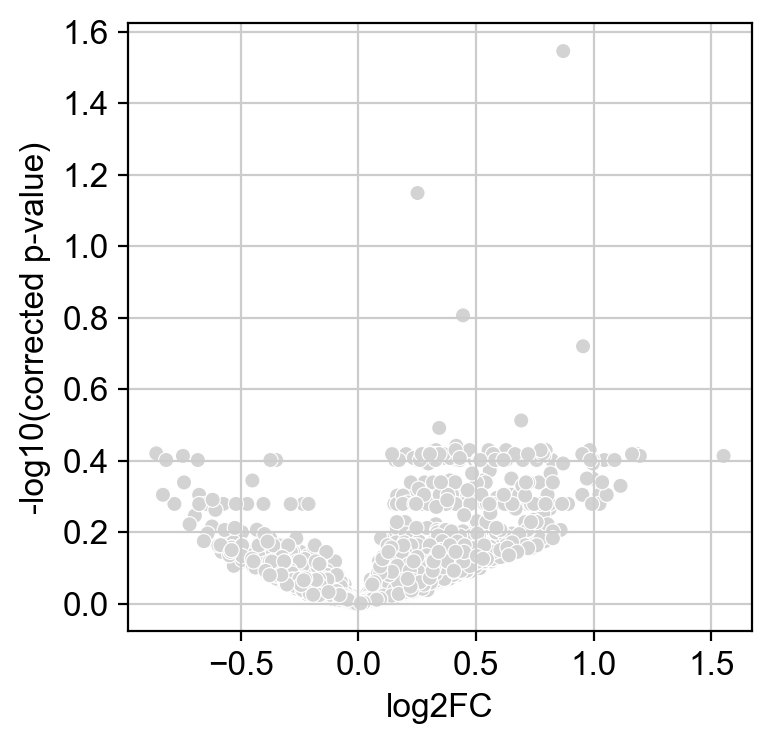

In [48]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG2.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [49]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG2.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_INHvsCTRL_AG2.csv')

In [50]:
today

'230831'

In [51]:
difxpy_3dpi_INHvsCTRL_AG2 = pd.read_csv(table_dir + '230831difxpy_reactiveastros_3dpi_INHvsCTRL_AG2.csv', index_col=0)

In [52]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_AG2=difxpy_3dpi_INHvsCTRL_AG2.loc[difxpy_3dpi_INHvsCTRL_AG2['mean']>0.2]

In [53]:
difxpy_3dpi_INHvsCTRL_expressed_AG2

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.507565,0.925503,0.164168,0.260355,False,2.076256e-10,0.164168,0.247751,-216.738018
2,Tcea1,0.207002,0.807788,0.311399,0.239645,False,9.458761e-10,0.311399,0.246779,-203.553938
3,Rgs20,0.527490,0.933656,-0.109415,0.497041,False,1.473543e-09,-0.109415,0.173168,-319.335991
5,Rb1cc1,0.166295,0.772432,0.319960,0.260355,False,4.796414e-01,0.319960,0.231150,-25.445421
7,Pcmtd1,0.575225,0.944758,0.108839,0.343195,False,7.588290e-04,0.108839,0.194226,-253.609781
...,...,...,...,...,...,...,...,...,...,...
4234,mt-Nd4l,0.007428,0.395899,0.517921,0.721893,False,4.702212e-11,0.517921,0.193471,-390.809982
4235,mt-Nd4,0.085688,0.715515,0.127785,14.295858,False,2.654080e-08,0.127785,0.074354,-1190.514718
4236,mt-Nd5,0.017054,0.512833,0.377700,1.556213,False,1.880096e-09,0.377700,0.158329,-573.467126
4237,mt-Cytb,0.388009,0.882725,0.059031,25.514793,False,1.184848e-08,0.059031,0.068383,-1365.179546


In [54]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_AG2 = difxpy_3dpi_INHvsCTRL_expressed_AG2.loc[difxpy_3dpi_INHvsCTRL_expressed_AG2['pval']<0.05]

In [55]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_3dpi_INH_AG2 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG2.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG2['log2fc']>0.7]
Astros_3dpi_CTRL_AG2 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG2.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG2['log2fc']<-0.7]

In [56]:
Astros_3dpi_INH_AG2.shape

(16, 10)

In [57]:
Astros_3dpi_CTRL_AG2.shape

(0, 10)

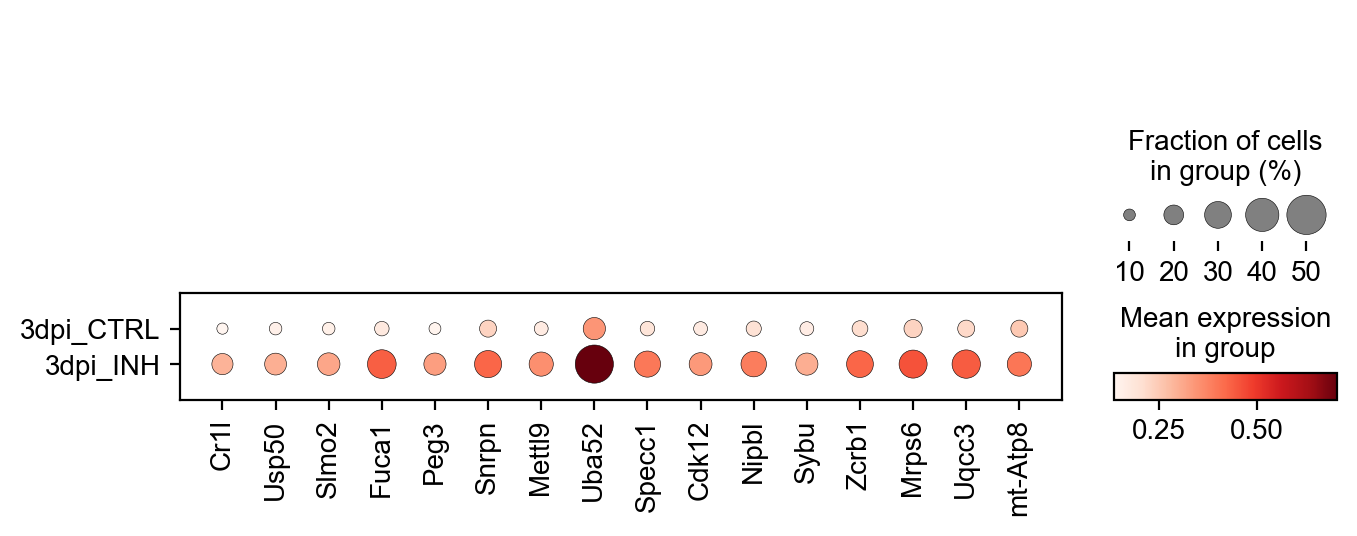

In [58]:
sc.pl.dotplot(adata_all_astros_3dpi_AG2,Astros_3dpi_INH_AG2['gene'], groupby='condition',)

# Cluster AG3

In [59]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG3= de.test.wald(
    data=adata_all_astros_3dpi_AG3.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG3.var_names,
    sample_description=adata_all_astros_3dpi_AG3.obs
)

training location model: False
training scale model: True
iter   0: ll=13411780.797265
iter   1: ll=13411780.797265, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=624831.990850, converged: 0.24% (loc: 0.24%, scale update: True), in 10.86sec
iter   3: ll=624831.990850, converged: 0.24% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=545194.000758, converged: 84.44% (loc: 84.44%, scale update: True), in 10.16sec
iter   5: ll=545194.000758, converged: 84.44% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=538753.379060, converged: 96.05% (loc: 96.05%, scale update: True), in 5.93sec
iter   7: ll=538753.379060, converged: 96.05% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=537551.115191, converged: 99.36% (loc: 99.36%, scale update: True), in 5.24sec
iter   9: ll=537551.115191, converged: 99.36% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=537311.461512, converged: 99.86% (loc: 99.86%, scale update: T

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [60]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5672,Mbp,0.000064,0.377052,2.243896,0.394958,False,2.697035e-09,2.243896,0.561241,-78.218335
0,Mrpl15,0.834000,0.992276,0.051793,0.563025,False,4.626634e-11,0.051793,0.247136,-118.058788
3904,Pik3ip1,0.104243,0.992276,-0.397732,0.949580,False,7.399686e-09,-0.397732,0.244815,-158.534827
3903,Drg1,0.074024,0.992276,-1.144254,0.134454,False,2.372554e-01,-1.144254,0.640513,-16.566648
3902,Fyco1,0.298512,0.992276,-0.553385,0.142857,False,2.246543e-01,-0.553385,0.532291,-19.791167
3901,Lztfl1,0.591996,0.992276,-0.237532,0.184874,False,1.520178e-01,-0.237532,0.443203,0.000000
3900,Sacm1l,0.731076,0.992276,-0.188742,0.134454,False,2.128121e-10,-0.188742,0.549157,-49.075138
3899,Exosc7,0.165342,0.992276,-0.571734,0.260504,False,9.442841e-10,-0.571734,0.412112,-75.181101
3898,1110059G10Rik,0.490325,0.992276,-0.248461,0.302521,False,1.002715e-10,-0.248461,0.360197,-83.168778
3897,Abhd5,0.795273,0.992276,-0.147920,0.109244,False,2.997476e-04,-0.147920,0.570088,-41.707260


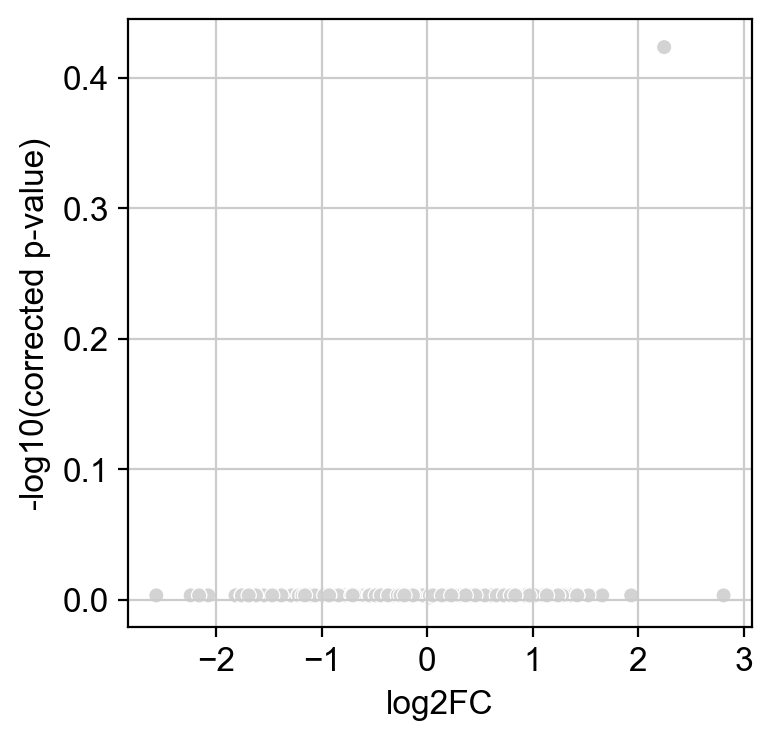

In [61]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG3.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [62]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG3.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_INHvsCTRL_AG3.csv')

In [63]:
difxpy_3dpi_INHvsCTRL_AG3 = pd.read_csv(table_dir + '230831difxpy_reactiveastros_3dpi_INHvsCTRL_AG3.csv', index_col=0)

In [64]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_AG3=difxpy_3dpi_INHvsCTRL_AG3.loc[difxpy_3dpi_INHvsCTRL_AG3['mean']>0.2]

In [65]:
difxpy_3dpi_INHvsCTRL_expressed_AG3

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.834000,0.992276,0.051793,0.563025,False,4.626634e-11,0.051793,0.247136,-118.058788
2,Tcea1,0.550958,0.992276,0.182322,0.361345,False,4.869017e-03,0.182322,0.305742,-1.216280
3,Rgs20,0.573270,0.992276,0.128712,1.394958,False,3.507734e-10,0.128712,0.228520,-193.224140
5,Rb1cc1,0.528732,0.992276,-0.265703,0.235294,False,1.118025e-09,-0.265703,0.421789,-71.313468
6,Pcmtd1,0.920926,0.992276,-0.034591,0.285714,False,3.859168e-01,-0.034591,0.348466,-16.703270
...,...,...,...,...,...,...,...,...,...,...
5898,mt-Nd4l,0.921503,0.992276,0.024249,0.966387,False,3.673493e-09,0.024249,0.246082,-161.758186
5899,mt-Nd4,0.052496,0.992276,0.226535,26.932773,False,1.005529e-08,0.226535,0.116828,-488.681026
5900,mt-Nd5,0.726977,0.992276,0.052863,2.386555,False,7.534547e-09,0.052863,0.151406,-231.290504
5901,mt-Cytb,0.219303,0.992276,0.138545,48.117647,False,1.123715e-07,0.138545,0.112787,-554.864989


In [66]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_AG3 = difxpy_3dpi_INHvsCTRL_expressed_AG3.loc[difxpy_3dpi_INHvsCTRL_expressed_AG3['pval']<0.05]

In [67]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_3dpi_INH_AG3 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG3.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG3['log2fc']>0.7]
Astros_3dpi_CTRL_AG3 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG3.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG3['log2fc']<-0.7]

In [68]:
Astros_3dpi_INH_AG3.shape

(35, 10)

In [69]:
Astros_3dpi_CTRL_AG3.shape

(41, 10)

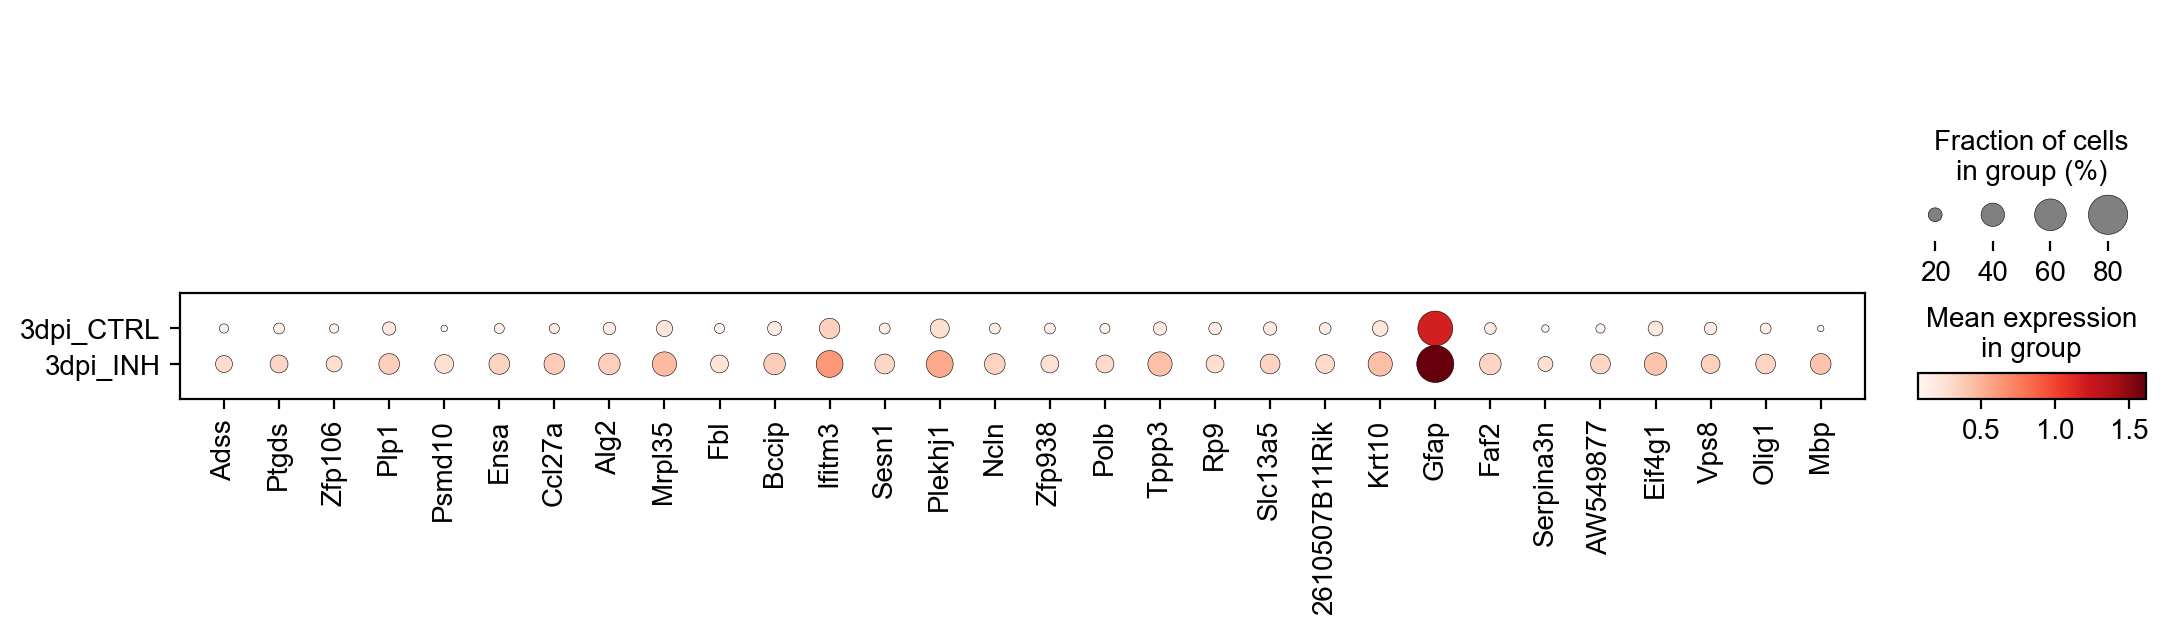

In [70]:
sc.pl.dotplot(adata_all_astros_3dpi_AG3,Astros_3dpi_INH_AG3['gene'].head(30) , groupby='condition',)

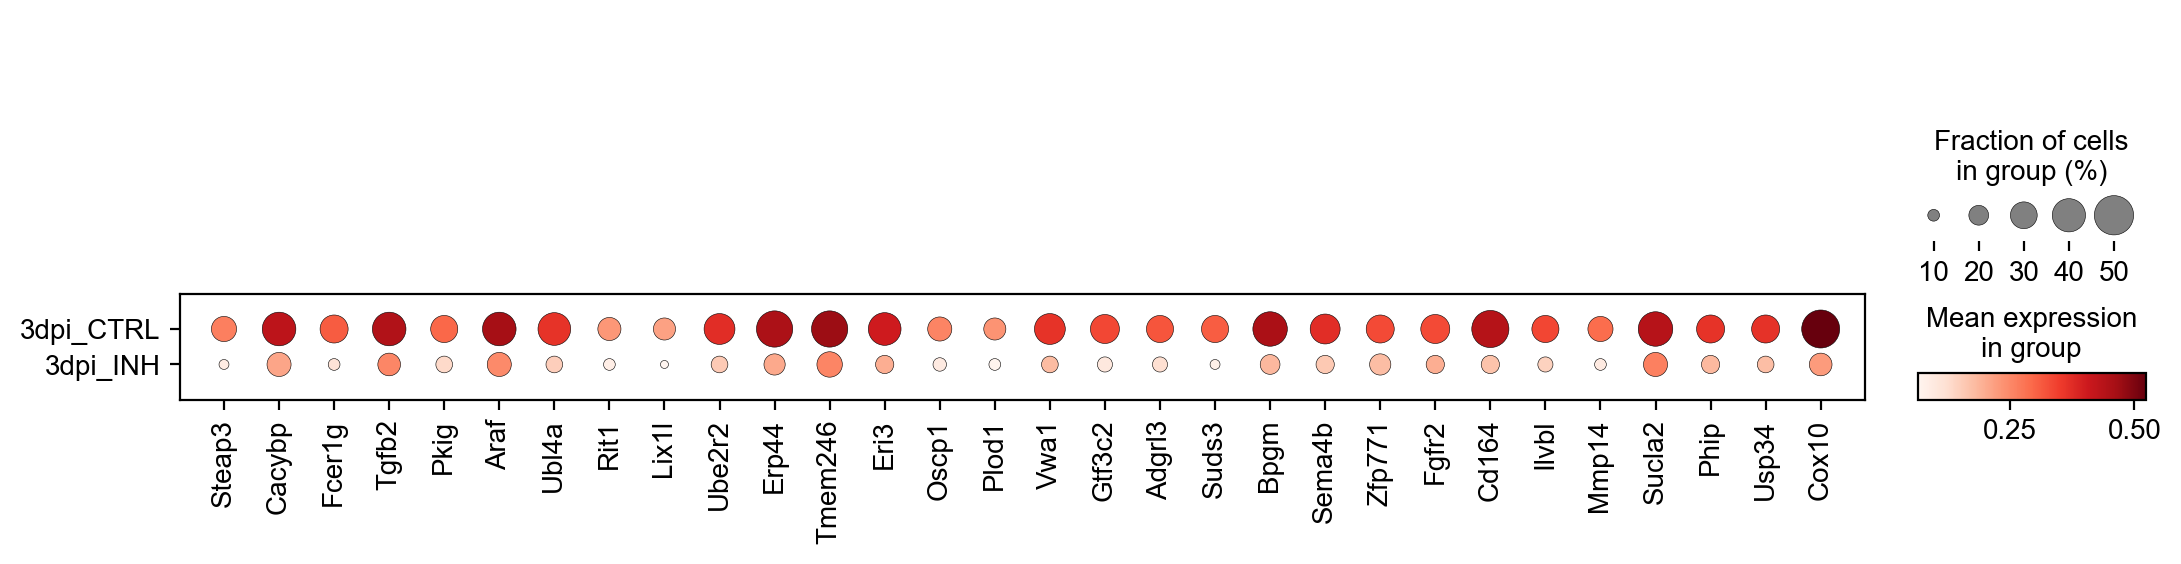

In [71]:
sc.pl.dotplot(adata_all_astros_3dpi_AG3,Astros_3dpi_CTRL_AG3['gene'].head(30) , groupby='condition',)

# Cluster AG4

In [72]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG4= de.test.wald(
    data=adata_all_astros_3dpi_AG4.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG4.var_names,
    sample_description=adata_all_astros_3dpi_AG4.obs
)

training location model: False
training scale model: True
iter   0: ll=5368009.503236
iter   1: ll=5368009.503236, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=346325.599675, converged: 0.07% (loc: 0.07%, scale update: True), in 8.71sec
iter   3: ll=346325.599675, converged: 0.07% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=321813.504440, converged: 88.23% (loc: 88.23%, scale update: True), in 8.45sec
iter   5: ll=321813.504440, converged: 88.23% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=319269.951000, converged: 97.44% (loc: 97.44%, scale update: True), in 5.42sec
iter   7: ll=319269.951000, converged: 97.44% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=318733.919604, converged: 99.52% (loc: 99.52%, scale update: True), in 4.96sec
iter   9: ll=318733.919604, converged: 99.52% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=318652.759836, converged: 99.85% (loc: 99.85%, scale update: True)

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [73]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5672,Mbp,0.000064,0.377052,2.243896,0.394958,False,2.697035e-09,2.243896,0.561241,-78.218335
0,Mrpl15,0.834000,0.992276,0.051793,0.563025,False,4.626634e-11,0.051793,0.247136,-118.058788
3904,Pik3ip1,0.104243,0.992276,-0.397732,0.949580,False,7.399686e-09,-0.397732,0.244815,-158.534827
3903,Drg1,0.074024,0.992276,-1.144254,0.134454,False,2.372554e-01,-1.144254,0.640513,-16.566648
3902,Fyco1,0.298512,0.992276,-0.553385,0.142857,False,2.246543e-01,-0.553385,0.532291,-19.791167
3901,Lztfl1,0.591996,0.992276,-0.237532,0.184874,False,1.520178e-01,-0.237532,0.443203,0.000000
3900,Sacm1l,0.731076,0.992276,-0.188742,0.134454,False,2.128121e-10,-0.188742,0.549157,-49.075138
3899,Exosc7,0.165342,0.992276,-0.571734,0.260504,False,9.442841e-10,-0.571734,0.412112,-75.181101
3898,1110059G10Rik,0.490325,0.992276,-0.248461,0.302521,False,1.002715e-10,-0.248461,0.360197,-83.168778
3897,Abhd5,0.795273,0.992276,-0.147920,0.109244,False,2.997476e-04,-0.147920,0.570088,-41.707260


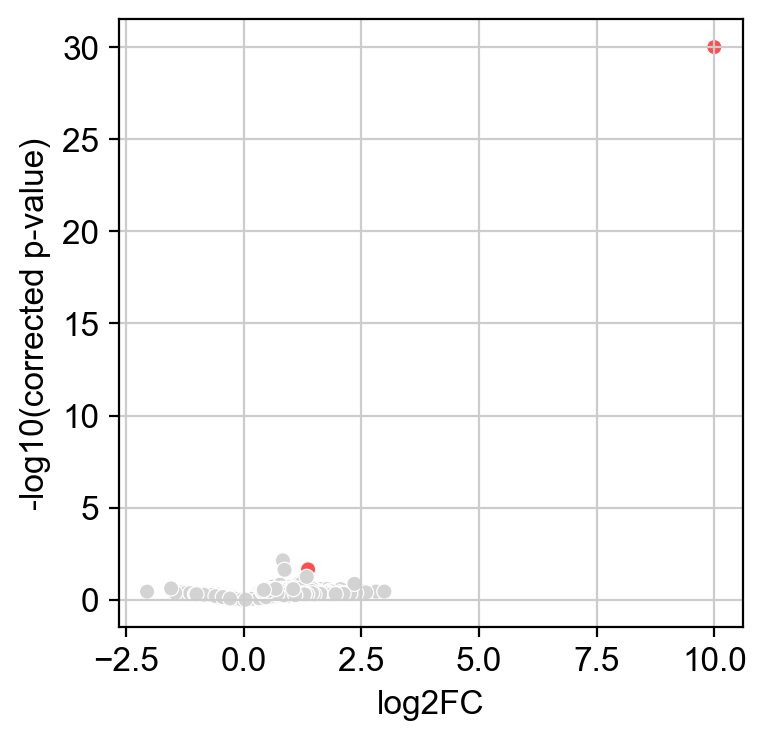

In [74]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG4.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [75]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG4.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_INHvsCTRL_AG4.csv')

In [76]:
difxpy_3dpi_INHvsCTRL_AG4 = pd.read_csv(table_dir + '230831difxpy_reactiveastros_3dpi_INHvsCTRL_AG4.csv', index_col=0)

In [77]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_AG4=difxpy_3dpi_INHvsCTRL_AG4.loc[difxpy_3dpi_INHvsCTRL_AG4['mean']>0.2]

In [78]:
difxpy_3dpi_INHvsCTRL_expressed_AG4

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1,Rgs20,0.079205,0.500357,0.712142,0.438095,False,2.560389e-09,0.712142,0.405705,-91.119149
3,Rb1cc1,0.016243,0.405964,1.277456,0.314286,False,3.673170e-10,1.277456,0.531519,-72.325619
4,Pcmtd1,0.016690,0.405964,1.547119,0.238095,False,1.079149e-09,1.547119,0.646393,-59.854120
6,Adhfe1,0.876521,0.950602,0.065515,0.228571,False,3.084032e-02,0.065515,0.421637,-22.111709
10,Cspp1,0.111456,0.516227,0.550117,0.600000,False,3.149549e-09,0.550117,0.345620,-109.849787
...,...,...,...,...,...,...,...,...,...,...
4564,mt-Nd4l,0.000100,0.056906,1.338480,1.390476,False,3.807702e-10,1.338480,0.343943,-159.078227
4565,mt-Nd4,0.005366,0.335987,0.404198,38.980952,False,2.347142e-09,0.404198,0.145175,-477.843533
4566,mt-Nd5,0.001501,0.254058,0.678897,3.495238,False,1.070794e-09,0.678897,0.213856,-245.219842
4568,mt-Cytb,0.003004,0.290147,0.426562,68.990476,False,9.344737e-08,0.426562,0.143754,-536.883998


In [79]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_AG4 = difxpy_3dpi_INHvsCTRL_expressed_AG4.loc[difxpy_3dpi_INHvsCTRL_expressed_AG4['pval']<0.05]

In [80]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_3dpi_INH_AG4 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG4.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG4['log2fc']>0.7]
Astros_3dpi_CTRL_AG4 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG4.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG4['log2fc']<-0.7]

In [81]:
Astros_3dpi_INH_AG4.shape

(249, 10)

In [82]:
Astros_3dpi_CTRL_AG4.shape

(2, 10)

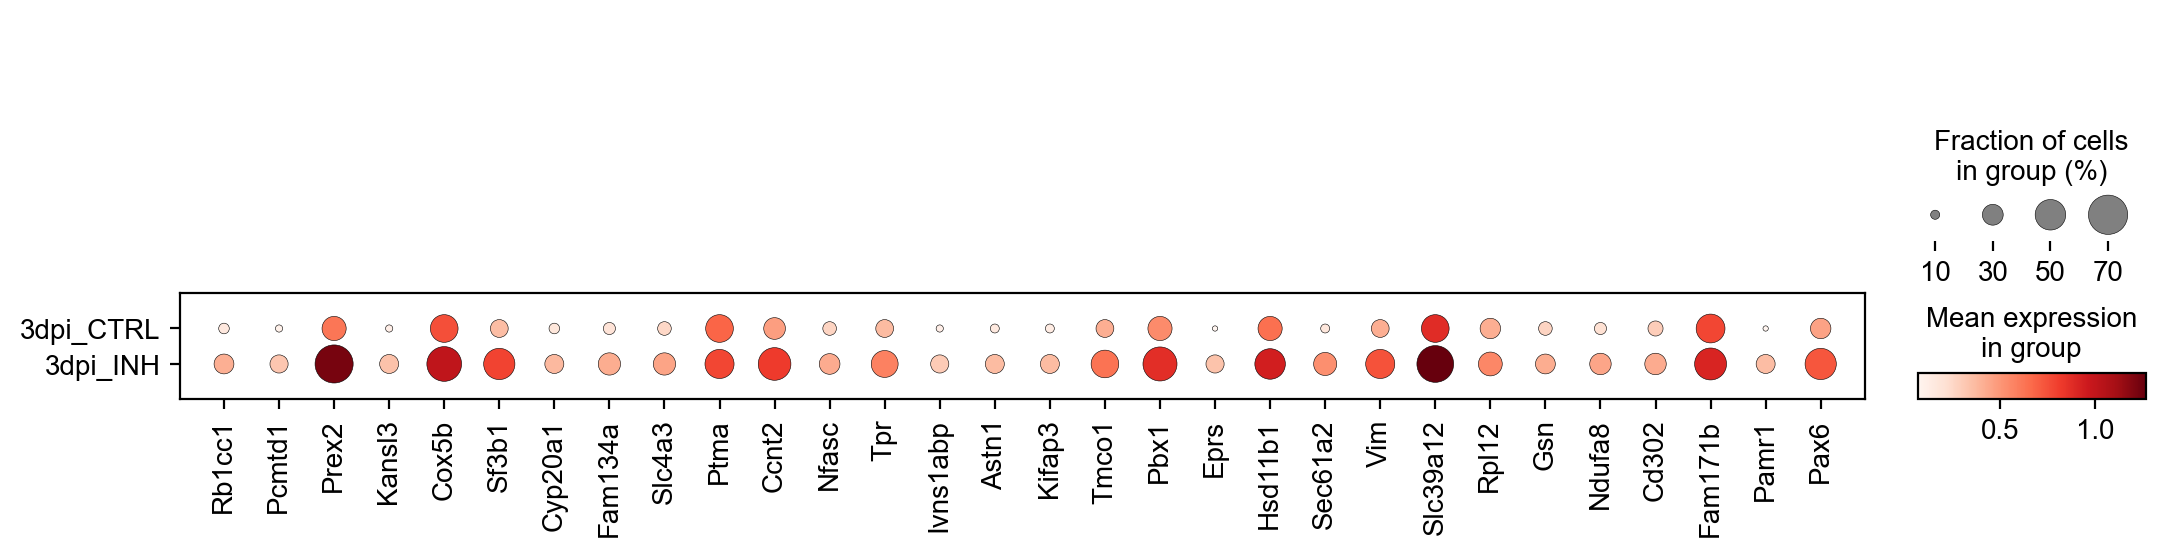

In [83]:
sc.pl.dotplot(adata_all_astros_3dpi_AG4,Astros_3dpi_INH_AG4['gene'].head(30) , groupby='condition',)

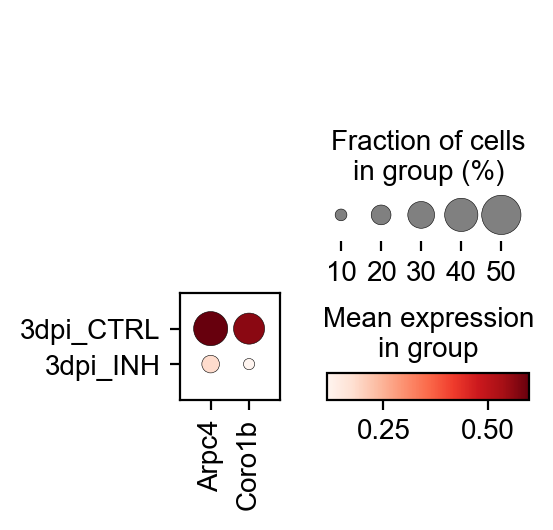

In [84]:
sc.pl.dotplot(adata_all_astros_3dpi_AG4,Astros_3dpi_CTRL_AG4['gene'].head(30) , groupby='condition',)

# Cluster AG5

In [85]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG5= de.test.wald(
    data=adata_all_astros_3dpi_AG5.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG5.var_names,
    sample_description=adata_all_astros_3dpi_AG5.obs
)

training location model: False
training scale model: True
iter   0: ll=18914504.446640
iter   1: ll=18914504.446640, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2185920.255145, converged: 0.25% (loc: 0.25%, scale update: True), in 12.57sec
iter   3: ll=2185920.255145, converged: 0.25% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2107852.863770, converged: 91.12% (loc: 91.12%, scale update: True), in 12.15sec
iter   5: ll=2107852.863770, converged: 91.12% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=2098812.371514, converged: 98.21% (loc: 98.21%, scale update: True), in 5.95sec
iter   7: ll=2098812.371514, converged: 98.21% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=2097362.353364, converged: 99.70% (loc: 99.70%, scale update: True), in 5.42sec
iter   9: ll=2097362.353364, converged: 99.70% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=2097207.461378, converged: 99.96% (loc: 99.96%, scale 

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [86]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5672,Mbp,0.000064,0.377052,2.243896,0.394958,False,2.697035e-09,2.243896,0.561241,-78.218335
0,Mrpl15,0.834000,0.992276,0.051793,0.563025,False,4.626634e-11,0.051793,0.247136,-118.058788
3904,Pik3ip1,0.104243,0.992276,-0.397732,0.949580,False,7.399686e-09,-0.397732,0.244815,-158.534827
3903,Drg1,0.074024,0.992276,-1.144254,0.134454,False,2.372554e-01,-1.144254,0.640513,-16.566648
3902,Fyco1,0.298512,0.992276,-0.553385,0.142857,False,2.246543e-01,-0.553385,0.532291,-19.791167
3901,Lztfl1,0.591996,0.992276,-0.237532,0.184874,False,1.520178e-01,-0.237532,0.443203,0.000000
3900,Sacm1l,0.731076,0.992276,-0.188742,0.134454,False,2.128121e-10,-0.188742,0.549157,-49.075138
3899,Exosc7,0.165342,0.992276,-0.571734,0.260504,False,9.442841e-10,-0.571734,0.412112,-75.181101
3898,1110059G10Rik,0.490325,0.992276,-0.248461,0.302521,False,1.002715e-10,-0.248461,0.360197,-83.168778
3897,Abhd5,0.795273,0.992276,-0.147920,0.109244,False,2.997476e-04,-0.147920,0.570088,-41.707260


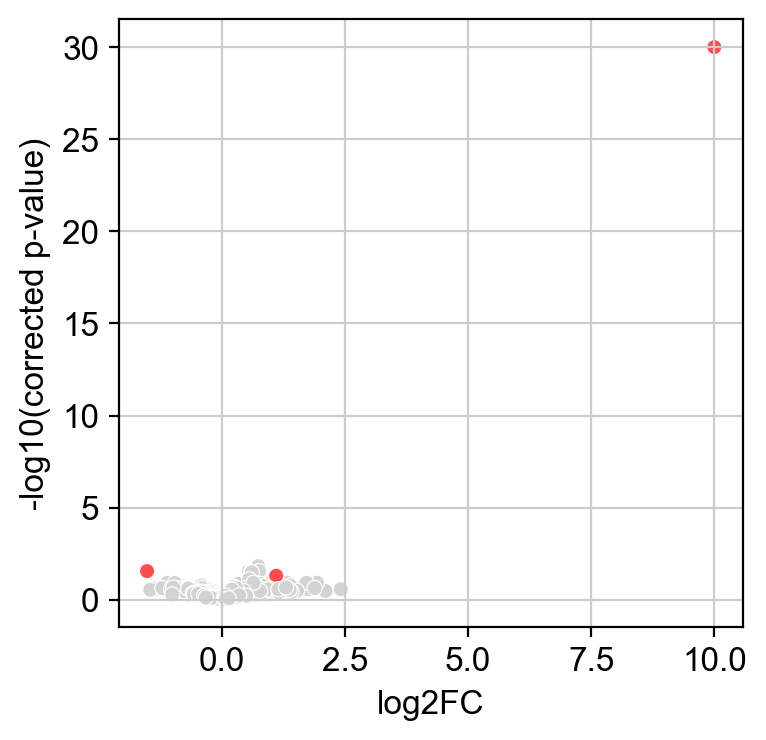

In [87]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG5.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [88]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG5.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_INHvsCTRL_AG5.csv')

In [89]:
difxpy_3dpi_INHvsCTRL_AG5 = pd.read_csv(table_dir + '230831difxpy_reactiveastros_3dpi_INHvsCTRL_AG5.csv', index_col=0)

In [90]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_AG5=difxpy_3dpi_INHvsCTRL_AG5.loc[difxpy_3dpi_INHvsCTRL_AG5['mean']>0.2]

In [91]:
difxpy_3dpi_INHvsCTRL_expressed_AG5

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.961778,0.987911,0.008166,0.846457,False,1.241392e-09,0.008166,0.170392,-315.203402
1,Lypla1,0.792750,0.918441,-0.060788,0.515748,False,2.428318e-09,-0.060788,0.231361,-246.202936
2,Tcea1,0.571848,0.816898,-0.092591,0.814961,False,8.258177e-10,-0.092591,0.163783,-306.155214
3,Rgs20,0.911805,0.964720,-0.015041,2.322835,False,8.103985e-09,-0.015041,0.135796,-505.449766
4,Atp6v1h,0.085375,0.413748,0.337780,0.744094,False,4.094908e-09,0.337780,0.196348,-294.406488
...,...,...,...,...,...,...,...,...,...,...
8259,mt-Nd6,0.250093,0.602206,0.500299,0.212598,False,5.065345e-11,0.500299,0.434997,-140.232913
8260,mt-Cytb,0.251916,0.603954,0.080919,145.598425,False,6.392918e-08,0.080919,0.070628,-1421.713008
8261,Vamp7,0.212168,0.564914,0.357198,0.377953,False,7.366773e-11,0.357198,0.286302,-204.463810
8262,PISD,0.759063,0.904993,0.083661,0.456693,False,1.658347e-09,0.083661,0.272767,-229.859936


In [92]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_AG5 = difxpy_3dpi_INHvsCTRL_expressed_AG5.loc[difxpy_3dpi_INHvsCTRL_expressed_AG5['pval']<0.05]

In [93]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_3dpi_INH_AG5 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG5.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG5['log2fc']>0.7]
Astros_3dpi_CTRL_AG5 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG5.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG5['log2fc']<-0.7]

In [94]:
Astros_3dpi_INH_AG5.shape

(196, 10)

In [95]:
Astros_3dpi_CTRL_AG5.shape

(16, 10)

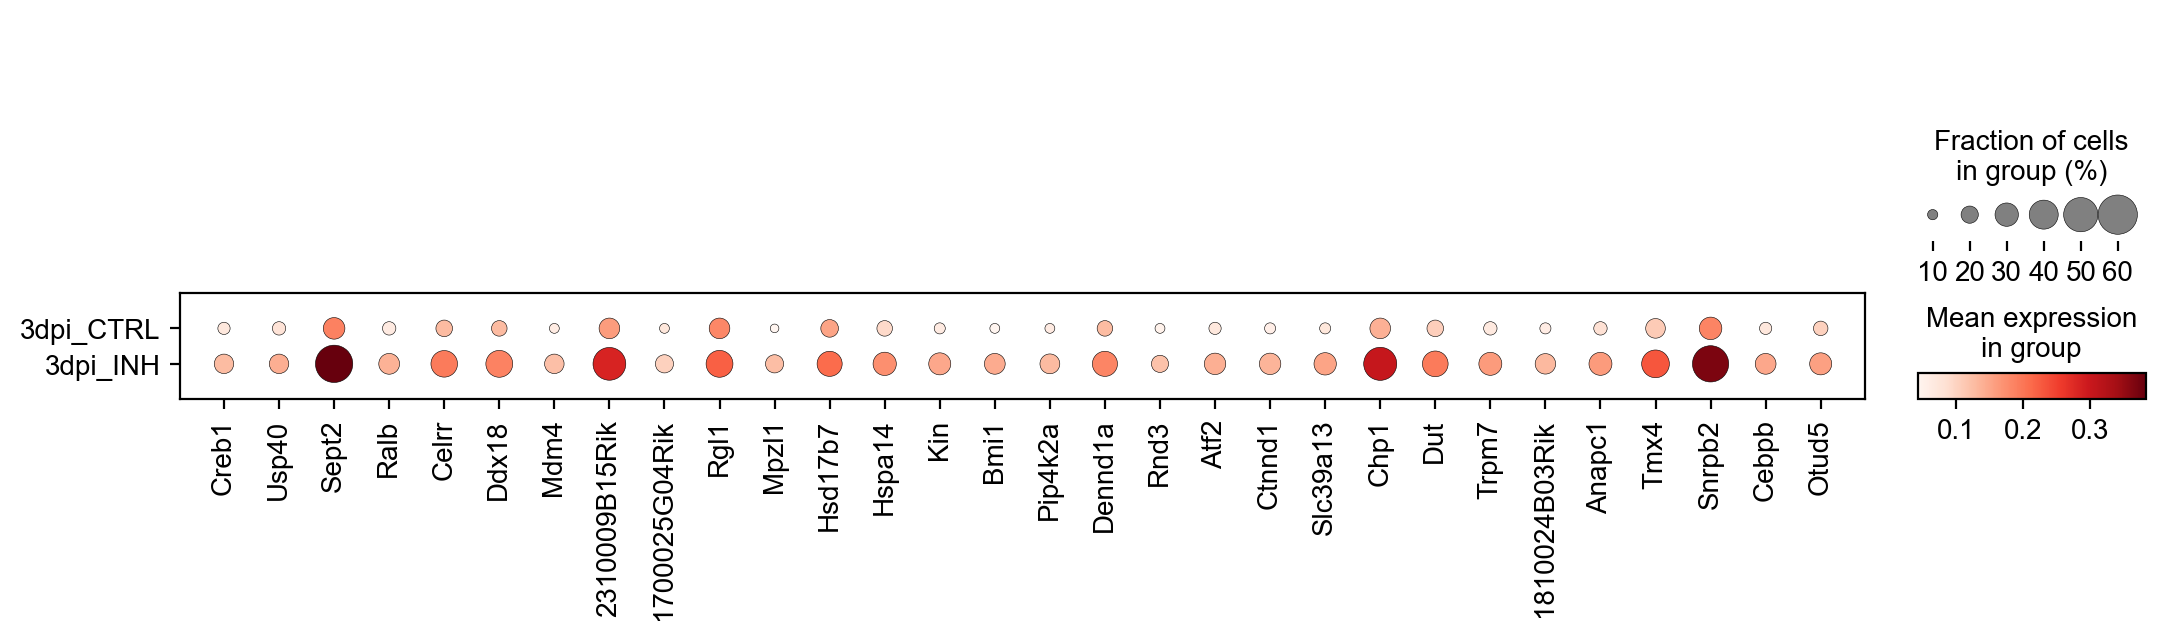

In [96]:
sc.pl.dotplot(adata_all_astros_3dpi_AG5,Astros_3dpi_INH_AG5['gene'].head(30) , groupby='condition',)

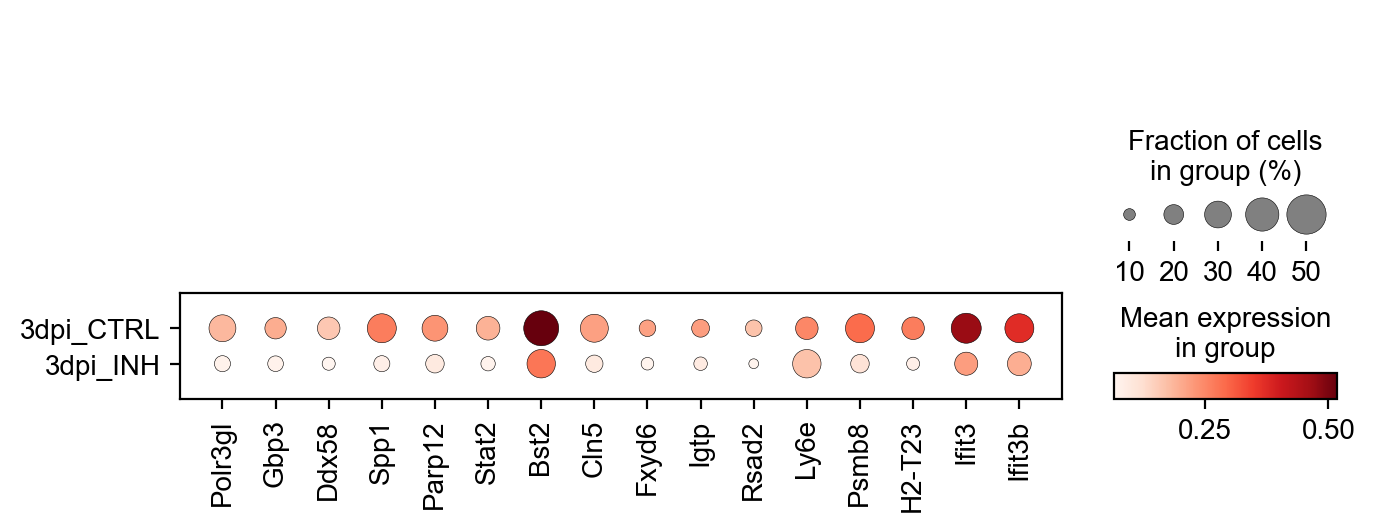

In [97]:
sc.pl.dotplot(adata_all_astros_3dpi_AG5,Astros_3dpi_CTRL_AG5['gene'].head(30) , groupby='condition',)

# Cluster AG6

In [98]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG6= de.test.wald(
    data=adata_all_astros_3dpi_AG6.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG6.var_names,
    sample_description=adata_all_astros_3dpi_AG6.obs
)

training location model: False
training scale model: True
iter   0: ll=4189809.431322
iter   1: ll=4189809.431322, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1451928.721360, converged: 0.29% (loc: 0.29%, scale update: True), in 8.89sec
iter   3: ll=1451928.721360, converged: 0.29% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1441433.529770, converged: 97.06% (loc: 97.06%, scale update: True), in 8.75sec
iter   5: ll=1441433.529770, converged: 97.06% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1439727.419848, converged: 99.39% (loc: 99.39%, scale update: True), in 5.15sec
iter   7: ll=1439727.419848, converged: 99.39% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1439418.919490, converged: 99.87% (loc: 99.87%, scale update: True), in 4.99sec
iter   9: ll=1439418.919490, converged: 99.87% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=1439381.256307, converged: 99.98% (loc: 99.98%, scale upda

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [99]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG6.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
4313,Malat1,1.171947e-10,5.226884e-07,-0.900594,6.613372,False,5.522560e-08,-0.900594,0.139780,-975.740125
4396,Ifit3,2.364725e-08,5.273337e-05,-1.447371,0.936047,False,2.082497e-09,-1.447371,0.259248,-382.003247
1421,Oasl2,1.389917e-06,2.066343e-03,-2.152839,0.165698,False,1.398006e-09,-2.152839,0.446051,-136.297730
1275,Isg15,2.918068e-06,3.253646e-03,-1.726755,1.322674,False,7.866150e-08,-1.726755,0.369240,-355.404599
3876,Rtp4,1.484222e-05,1.084436e-02,-1.321290,0.287791,False,1.544999e-08,-1.321290,0.305076,-212.369545
4397,Ifit3b,1.702030e-05,1.084436e-02,-1.190177,0.572674,False,4.049913e-10,-1.190177,0.276735,-306.633113
4276,Mbp,1.575965e-05,1.084436e-02,1.197519,0.476744,False,1.859760e-08,1.197519,0.277345,-291.042215
280,Ptgds,2.213169e-05,1.233842e-02,1.838072,0.514535,False,5.110871e-09,1.838072,0.433280,-216.078005
955,Gbp3,2.795080e-05,1.246606e-02,-1.326955,0.235465,False,9.199512e-09,-1.326955,0.316730,-188.893776
2373,Uba52,2.634337e-05,1.246606e-02,0.575830,2.441860,False,1.401628e-09,0.575830,0.137006,-704.086036


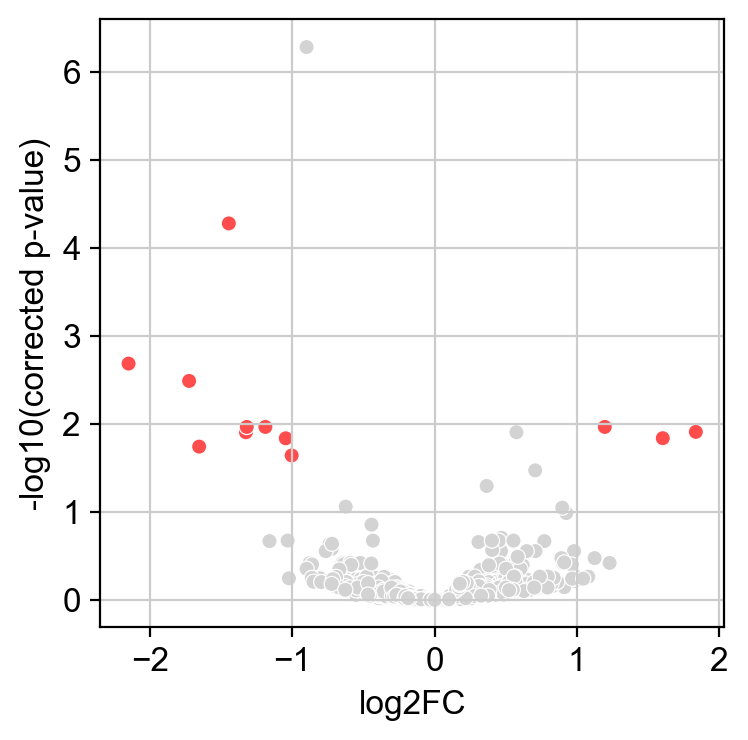

In [100]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG6.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [101]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG6.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_INHvsCTRL_AG6.csv')

In [102]:
difxpy_3dpi_INHvsCTRL_AG6 = pd.read_csv(table_dir + '230831difxpy_reactiveastros_3dpi_INHvsCTRL_AG6.csv', index_col=0)

In [103]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_AG6=difxpy_3dpi_INHvsCTRL_AG6.loc[difxpy_3dpi_INHvsCTRL_AG6['mean']>0.2]

In [104]:
difxpy_3dpi_INHvsCTRL_expressed_AG6

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.423717,0.954084,-0.133374,0.732558,False,2.376358e-11,-0.133374,0.166720,-405.665909
2,Tcea1,0.287967,0.907926,-0.217228,0.377907,False,1.846746e-10,-0.217228,0.204432,-277.872695
3,Rgs20,0.224681,0.880060,-0.178294,0.898256,False,2.662779e-10,-0.178294,0.146843,-449.754444
4,Atp6v1h,0.577314,0.983719,0.132827,0.287791,False,1.624021e-09,0.132827,0.238336,-235.122923
6,Rrs1,0.017231,0.623127,-0.605153,0.220930,False,1.075535e-11,-0.605153,0.254080,-195.755584
...,...,...,...,...,...,...,...,...,...,...
4453,mt-Nd3,0.024911,0.645953,0.226688,2.883721,False,3.622659e-10,0.226688,0.101075,-745.578092
4454,mt-Nd4l,0.001185,0.212228,0.555104,0.781977,False,3.786820e-09,0.555104,0.171201,-415.030152
4455,mt-Nd4,0.018286,0.628350,0.199319,21.014535,False,2.159519e-08,0.199319,0.084465,-1373.011566
4456,mt-Nd5,0.001222,0.212228,0.403459,2.165698,False,2.614833e-10,0.403459,0.124764,-673.066170


In [105]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_AG6 = difxpy_3dpi_INHvsCTRL_expressed_AG6.loc[difxpy_3dpi_INHvsCTRL_expressed_AG6['pval']<0.05]

In [106]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_3dpi_INH_AG6 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG6.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG6['log2fc']>0.7]
Astros_3dpi_CTRL_AG6 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG6.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG6['log2fc']<-0.7]

In [107]:
Astros_3dpi_INH_AG6.shape

(17, 10)

In [108]:
Astros_3dpi_CTRL_AG6.shape

(14, 10)

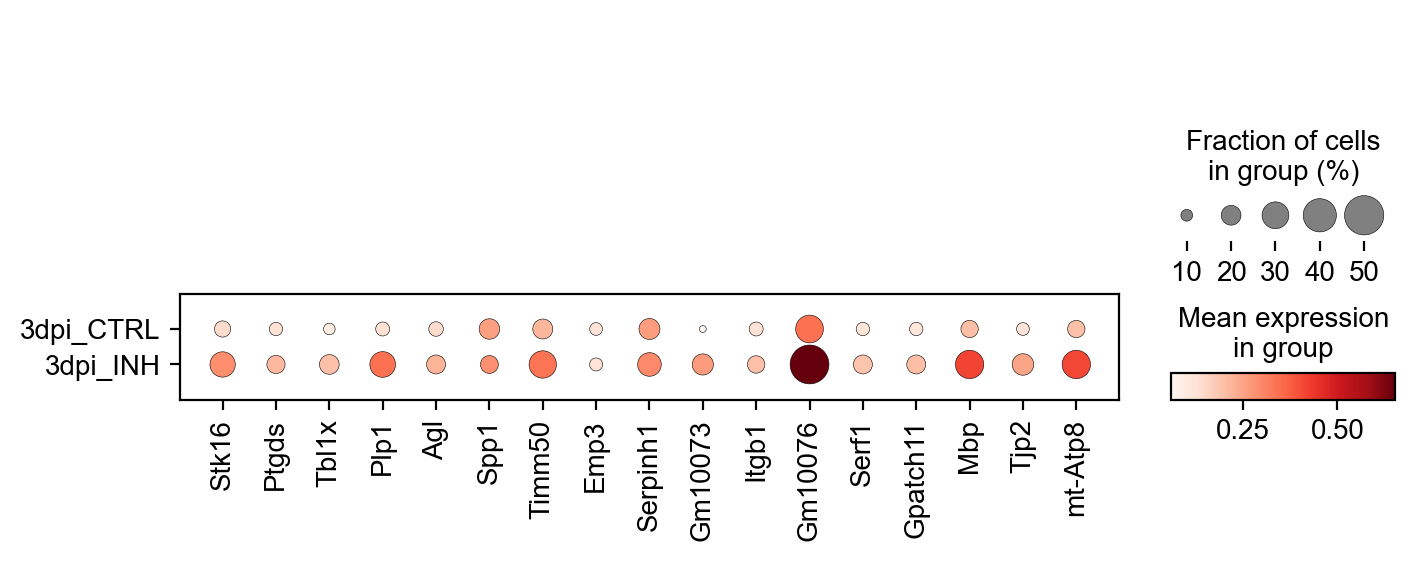

In [109]:
sc.pl.dotplot(adata_all_astros_3dpi_AG6,Astros_3dpi_INH_AG6['gene'].head(30) , groupby='condition',)

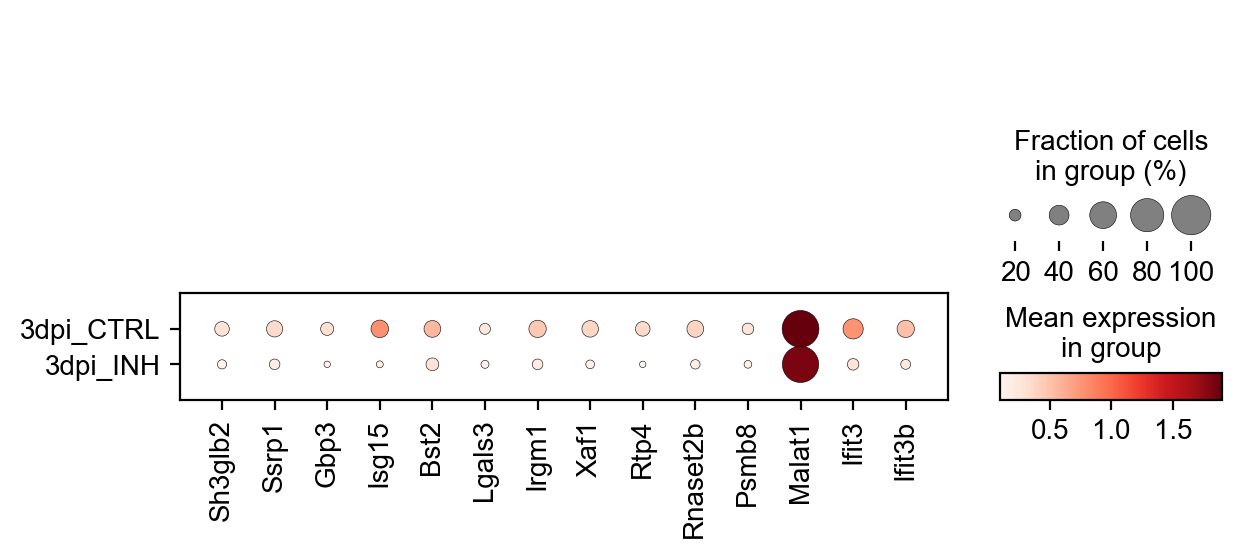

In [110]:
sc.pl.dotplot(adata_all_astros_3dpi_AG6,Astros_3dpi_CTRL_AG6['gene'].head(30) , groupby='condition',)

# Cluster AG7

In [111]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG7= de.test.wald(
    data=adata_all_astros_3dpi_AG7.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG7.var_names,
    sample_description=adata_all_astros_3dpi_AG7.obs
)

training location model: False
training scale model: True
iter   0: ll=17084203.800284
iter   1: ll=17084203.800284, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2303946.703577, converged: 0.39% (loc: 0.39%, scale update: True), in 13.43sec
iter   3: ll=2303946.703577, converged: 0.39% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2242918.350089, converged: 92.46% (loc: 92.46%, scale update: True), in 12.73sec
iter   5: ll=2242918.350089, converged: 92.46% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=2234849.656621, converged: 98.04% (loc: 98.04%, scale update: True), in 5.88sec
iter   7: ll=2234849.656621, converged: 98.04% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=2232914.796563, converged: 99.63% (loc: 99.63%, scale update: True), in 5.32sec
iter   9: ll=2232914.796563, converged: 99.63% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=2232666.398282, converged: 99.96% (loc: 99.96%, scale 

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [112]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5672,Mbp,0.000064,0.377052,2.243896,0.394958,False,2.697035e-09,2.243896,0.561241,-78.218335
0,Mrpl15,0.834000,0.992276,0.051793,0.563025,False,4.626634e-11,0.051793,0.247136,-118.058788
3904,Pik3ip1,0.104243,0.992276,-0.397732,0.949580,False,7.399686e-09,-0.397732,0.244815,-158.534827
3903,Drg1,0.074024,0.992276,-1.144254,0.134454,False,2.372554e-01,-1.144254,0.640513,-16.566648
3902,Fyco1,0.298512,0.992276,-0.553385,0.142857,False,2.246543e-01,-0.553385,0.532291,-19.791167
3901,Lztfl1,0.591996,0.992276,-0.237532,0.184874,False,1.520178e-01,-0.237532,0.443203,0.000000
3900,Sacm1l,0.731076,0.992276,-0.188742,0.134454,False,2.128121e-10,-0.188742,0.549157,-49.075138
3899,Exosc7,0.165342,0.992276,-0.571734,0.260504,False,9.442841e-10,-0.571734,0.412112,-75.181101
3898,1110059G10Rik,0.490325,0.992276,-0.248461,0.302521,False,1.002715e-10,-0.248461,0.360197,-83.168778
3897,Abhd5,0.795273,0.992276,-0.147920,0.109244,False,2.997476e-04,-0.147920,0.570088,-41.707260


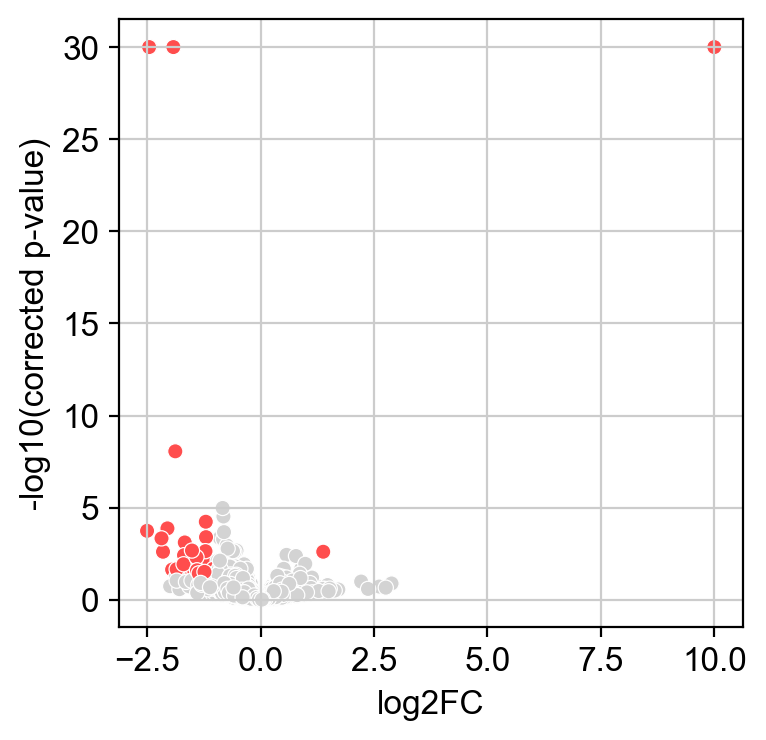

In [113]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG7.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [114]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG7.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_INHvsCTRL_AG7.csv')

In [115]:
difxpy_3dpi_INHvsCTRL_AG7 = pd.read_csv(table_dir + '230831difxpy_reactiveastros_3dpi_INHvsCTRL_AG7.csv', index_col=0)

In [116]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_AG7=difxpy_3dpi_INHvsCTRL_AG7.loc[difxpy_3dpi_INHvsCTRL_AG7['mean']>0.2]

In [117]:
difxpy_3dpi_INHvsCTRL_expressed_AG7

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.094470,0.453059,-0.220275,2.376289,False,2.020884e-08,-0.220275,0.131722,-381.921156
1,Lypla1,0.742138,0.927910,0.074550,0.690722,False,2.606939e-09,0.074550,0.226581,-220.770157
2,Tcea1,0.813104,0.952275,-0.038437,1.309278,False,1.304817e-09,-0.038437,0.162575,-298.734369
3,Rgs20,0.108209,0.470329,-0.208805,3.546392,False,5.187647e-10,-0.208805,0.129991,-450.445572
4,Atp6v1h,0.235418,0.631249,-0.168727,1.597938,False,6.623387e-09,-0.168727,0.142203,-321.132041
...,...,...,...,...,...,...,...,...,...,...
9679,mt-Nd6,0.359260,0.734913,-0.396736,0.345361,False,3.629273e-09,-0.396736,0.432752,-136.714718
9680,mt-Cytb,0.797511,0.947793,-0.024674,131.778351,False,1.865863e-08,-0.024674,0.096167,-1101.500867
9681,Vamp7,0.865672,0.962698,-0.035451,0.639175,False,3.526454e-09,-0.035451,0.209572,-208.791353
9682,PISD,0.899747,0.973536,0.028147,0.597938,False,7.253005e-10,0.028147,0.223421,-202.591207


In [118]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_AG7 = difxpy_3dpi_INHvsCTRL_expressed_AG7.loc[difxpy_3dpi_INHvsCTRL_expressed_AG7['pval']<0.05]

In [119]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_3dpi_INH_AG7 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG7.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG7['log2fc']>0.7]
Astros_3dpi_CTRL_AG7 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG7.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG7['log2fc']<-0.7]

In [120]:
Astros_3dpi_INH_AG7.shape

(64, 10)

In [121]:
Astros_3dpi_CTRL_AG7.shape

(193, 10)

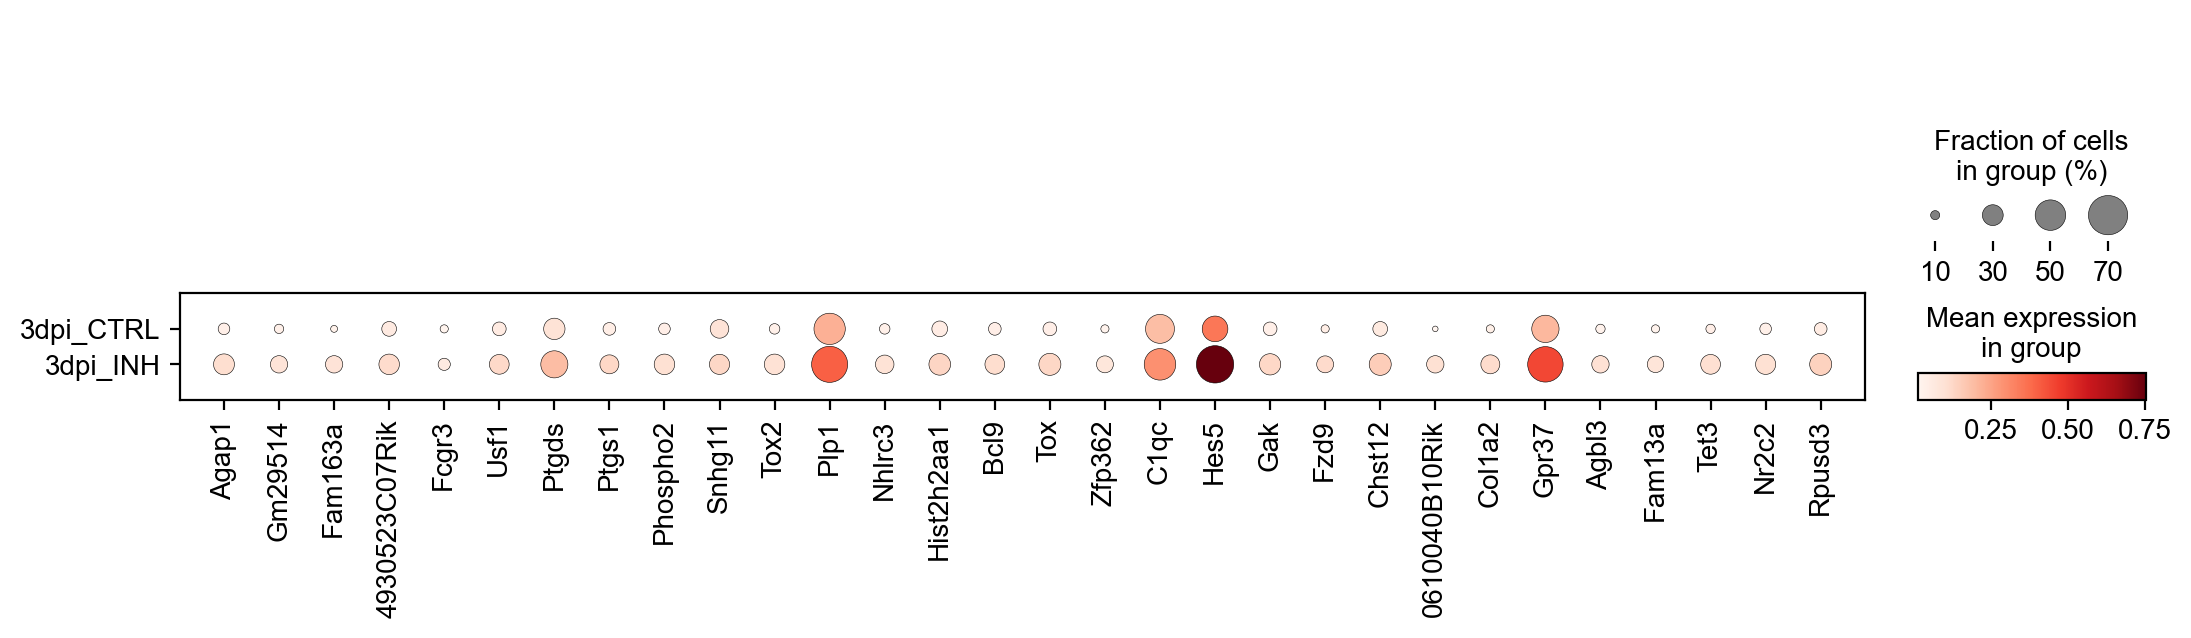

In [122]:
sc.pl.dotplot(adata_all_astros_3dpi_AG7,Astros_3dpi_INH_AG7['gene'].head(30) , groupby='condition',)

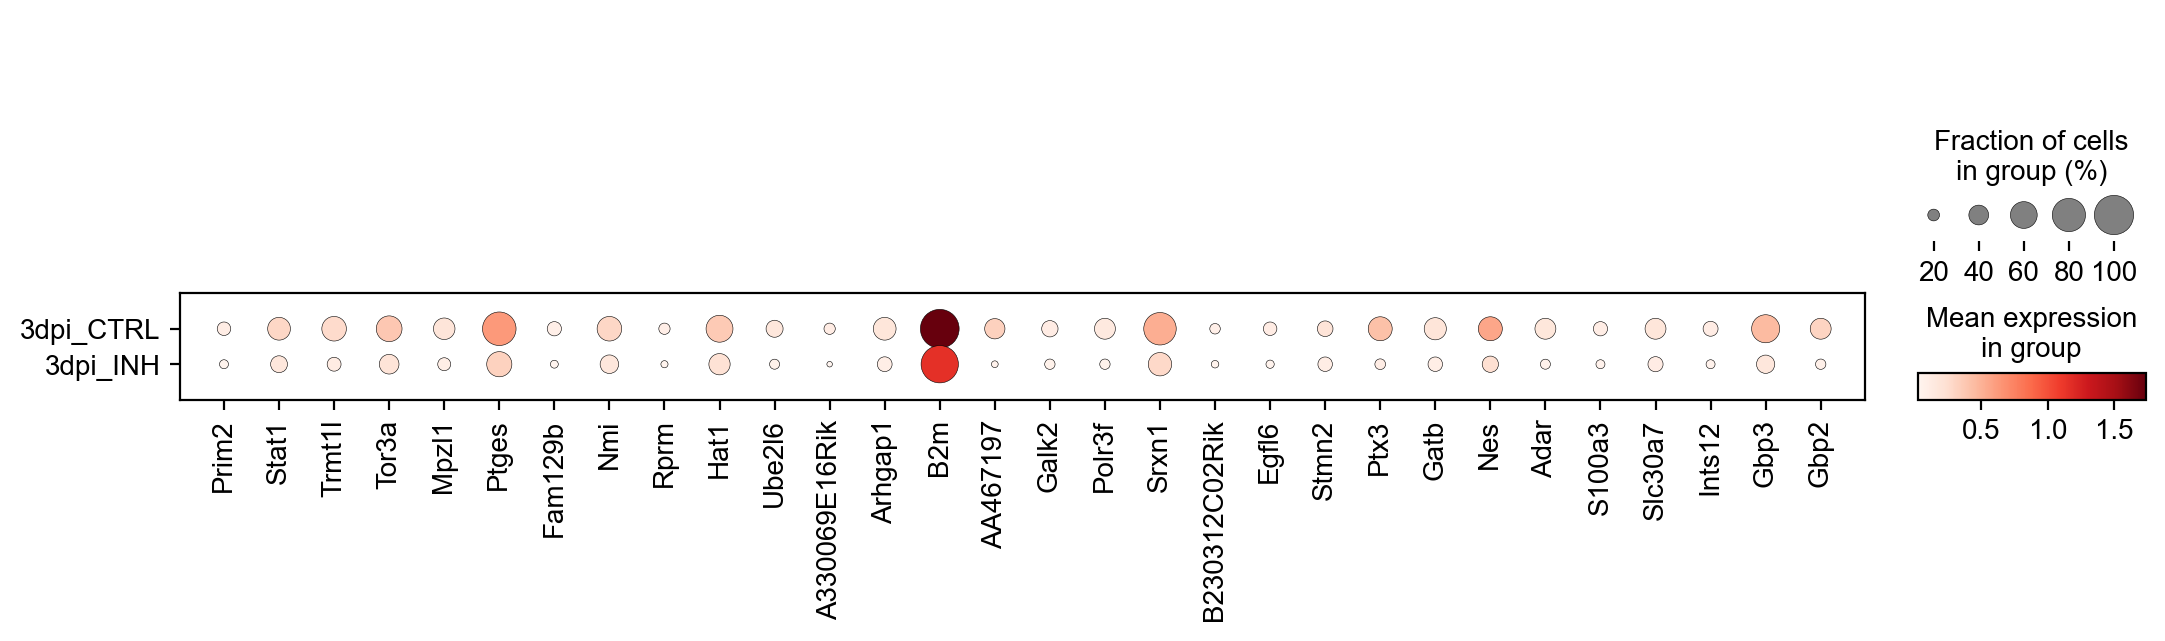

In [123]:
sc.pl.dotplot(adata_all_astros_3dpi_AG7,Astros_3dpi_CTRL_AG7['gene'].head(30) , groupby='condition',)

# Cluster AG8

In [124]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG8= de.test.wald(
    data=adata_all_astros_3dpi_AG8.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG8.var_names,
    sample_description=adata_all_astros_3dpi_AG8.obs
)

training location model: False
training scale model: True
iter   0: ll=3887434.446140
iter   1: ll=3887434.446140, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=984390.363960, converged: 0.28% (loc: 0.28%, scale update: True), in 10.72sec
iter   3: ll=984390.363960, converged: 0.28% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=969481.658387, converged: 96.04% (loc: 96.04%, scale update: True), in 10.55sec
iter   5: ll=969481.658387, converged: 96.04% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=967382.363271, converged: 98.76% (loc: 98.76%, scale update: True), in 5.29sec
iter   7: ll=967382.363271, converged: 98.76% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=967093.121625, converged: 99.81% (loc: 99.81%, scale update: True), in 5.13sec
iter   9: ll=967093.121625, converged: 99.81% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=967092.770117, converged: 99.99% (loc: 99.99%, scale update: Tru

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [125]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG8.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
243,Klhdc8a,0.000000e+00,0.000000e+00,-297.776029,0.201493,False,2.970313e-10,-297.776029,2.222759e-162,-57.338316
4342,Gm26772,0.000000e+00,0.000000e+00,-7.317907,48.485075,False,5.244333e-09,-7.317907,8.261427e-01,-256.181019
369,Ifi203,0.000000e+00,0.000000e+00,-297.776029,0.701493,False,5.726012e-10,-297.776029,2.222759e-162,-102.465918
5067,Hba-a1,6.661338e-16,1.251832e-12,2.978907,14.582090,False,1.479685e-08,2.978907,3.694242e-01,-307.024354
5068,Hba-a2,5.446754e-13,8.188650e-10,2.650311,10.776119,False,2.443773e-08,2.650311,3.674016e-01,-296.966797
3354,Hbb-bs,1.138023e-11,1.425753e-08,1.951805,25.679104,False,4.954759e-09,1.951805,2.875432e-01,-468.363457
3844,Lyz2,3.492258e-10,3.750186e-07,-2.224074,4.582090,False,2.800004e-08,-2.224074,3.544239e-01,-266.919158
5333,Ccl5,4.268388e-09,4.010684e-06,3.496290,5.902985,False,1.978487e-08,3.496290,5.952712e-01,-151.993910
1475,Ctss,9.367654e-09,7.824073e-06,-1.671060,3.029851,False,7.952747e-10,-1.671060,2.910343e-01,-266.657250
3353,Hbb-bt,2.347761e-08,1.764812e-05,2.955947,4.507463,False,1.247293e-08,2.955947,5.293410e-01,-167.906353


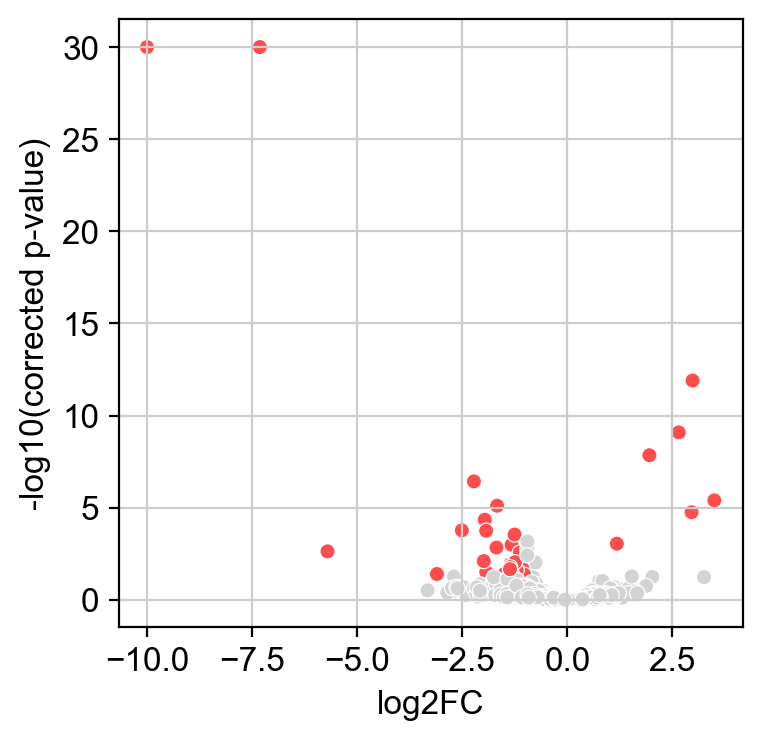

In [126]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG8.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [127]:
difxpy_reactiveastros_3dpi_INHvsCTRL_AG8.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_INHvsCTRL_AG8.csv')

In [128]:
difxpy_3dpi_INHvsCTRL_AG8 = pd.read_csv(table_dir + '230831difxpy_reactiveastros_3dpi_INHvsCTRL_AG8.csv', index_col=0)

In [129]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_AG8=difxpy_3dpi_INHvsCTRL_AG8.loc[difxpy_3dpi_INHvsCTRL_AG8['mean']>0.2]

In [130]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_AG8 = difxpy_3dpi_INHvsCTRL_expressed_AG8.loc[difxpy_3dpi_INHvsCTRL_expressed_AG8['pval']<0.05]

In [131]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_3dpi_INH_AG8 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG8.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG8['log2fc']>0.7]
Astros_3dpi_CTRL_AG8 = difxpy_3dpi_INHvsCTRL_expressed_signif_AG8.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_AG8['log2fc']<-0.7]

In [132]:
Astros_3dpi_INH_AG8.shape

(60, 10)

In [133]:
Astros_3dpi_CTRL_AG8.shape

(262, 10)

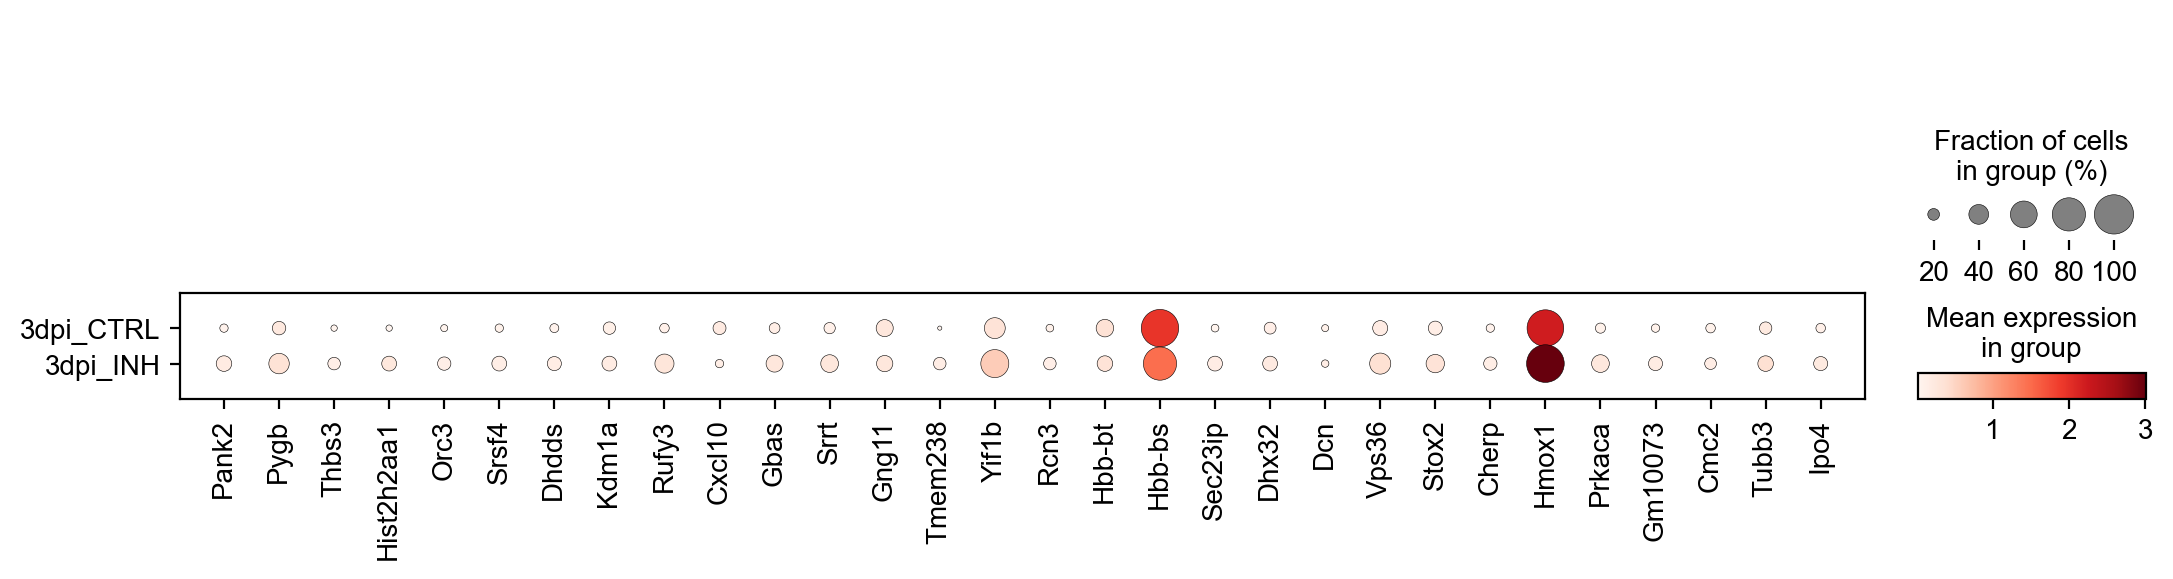

In [134]:
sc.pl.dotplot(adata_all_astros_3dpi_AG8,Astros_3dpi_INH_AG8['gene'].head(30) , groupby='condition',)